# Import Modules 

In [1]:
import numpy as np 
import math as m 
import matplotlib.pyplot as plt 
# import scipy as sc
# import scipy.stats as stat
from numpy.random import seed 
from numpy.random import rand 
from scipy import stats 


# Define Gaussian 
* mu = $\mu_{x}$ = Expected value 
* sigma = $\sigma_{x}$ = Standard Deviation (SD)
> * SD of the difference between the expected and mesured values 
> * This is the sigma of the measured result 
> * This sigma is our best estimate of $\sigma_g$
> * This is the estimate of how much our estimate is uncertain
> * Found after doing error propagation of set of values 
> * In many cases this will be the $\sigma$ of your experimental result
* x1 and x2: 
> * These are values of x that will define the range of the plotted curve
* x_meausred = Measured value from anaysis 

# When sigma is not from experimental results
* When our expected result has it's own uncertainty 
> * In this example we say the expected result is exactly 9.8 without any unceratinty but this is not always the case. 


### Define Parameters 
# <font color='red'>Ask about this in relation to our work</font>

In [3]:
#The value we expect to get 
mu = 9.8 
#The Standard Diviation (where is this from)
sigma = 0.2

#Range of domain values
x1 = mu - 5.*sigma 
x2 = mu + 5.*sigma 


#Experimentally derived value 
x_measured = 10.1 

# Define points for plotting 

<Figure size 432x288 with 0 Axes>

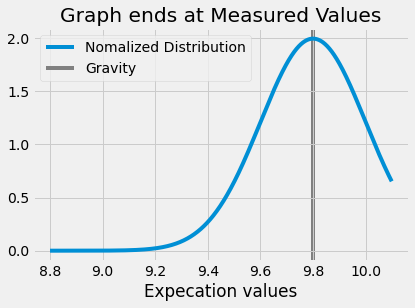

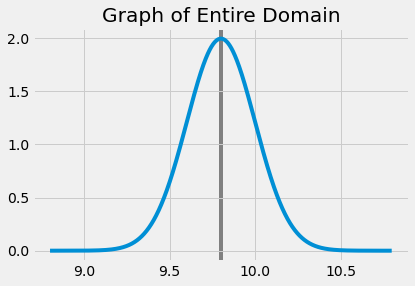

<Figure size 432x288 with 0 Axes>

In [14]:
#set of points for p-value, up to x_measured 
#np.arange(start,stop,step)

#Stops at the measured value 
x = np.arange(x1, x_measured, 0.001)


#set of all points in domain 
x_all = np.arange(x1, x2, 0.001)

#preset function which plots the curves of the gaussian 
#given set parameters 

#Y Untransformed: Takes the domain values up to measured, Expected Value, and SD plots a normal distribution 
y_untransformed = stats.norm.pdf(x, mu, sigma) 

#Plots all the values in the domain 
y2_untransformed = stats.norm.pdf(x_all, mu, sigma)

plt.figure(1)
plt.style.use('fivethirtyeight')
plt.plot(x,y_untransformed,label ="Nomalized Distribution")
plt.title("Graph ends at Measured Values")
plt.xlabel("Expecation values")
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")
plt.legend()


plt.figure(2)
plt.plot(x_all,y2_untransformed)
plt.title("Graph of Entire Domain")
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")

#plt.figure(3)
#plt.plot(x_all, y_untransformed) Does not work, not same dimension size

# Make a better plot 

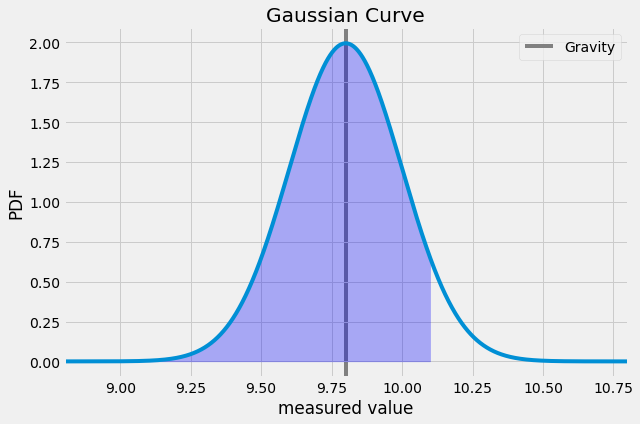

In [19]:
#build plot 

#sizing
fig, ax = plt.subplots(figsize = (9,6))
#style
plt.style.use('fivethirtyeight')
#inputs 
ax.plot(x_all, y2_untransformed)

#fillin 
ax.fill_between(x,y_untransformed, 0, alpha =0.3, color ='b')

#adjust the plot 

#x axis  limits
ax.set_xlim([x1,x2])
#x axis label 
ax.set_xlabel('measured value')
#y axis label
ax.set_ylabel('PDF')
#add line 
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")
#legend
ax.legend()
#Title 
ax.set_title("Gaussian Curve")
#show 
plt.show()

# Calculate the p-value "Probability Value" 
* the greater the difference between two observed values, the less likely it is that the difference is due to simple random chance, and this is reflected by a lower p-value
* The area under the curve 
* <font color='red'>Why are we looking into the tail values? </font>
* Doesn't this mean we are looking into the values where we found the measured to be less then 1-cdf = 0.0669 region?  

In [21]:
#print out the Probability value of the function 

cdf_unnorm = sc.stats.norm.cdf(x_measured, mu, sigma) #takes in the measured value 
print('CDF from the original distribution = ', cdf_unnorm)

CDF from the original distribution =  0.9331927987311412


In [26]:
#extract the following: 
# pr(x1<z<x2) = pr(z<x2)-pr(z<-x1) = pr(z<x2)-(1-pr(z<x1))

if cdf_unnorm > 0.5: 
    pvalue_2t = 2*(1-cdf_unnorm)
else: 
    pvalue_2t = 2*(cdf_unnorm)
print("Two tailed p-value = ",pvalue_2t )



Two tailed p-value =  0.1336144025377175


# Transform to Normal (z-score) 

In [27]:
# z transform: shift the mean to zero and make SD= 1 

z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

z_measured = (x_measured - mu) / sigma 

#define the arrays that contian the z values for the transformed plot

z = np.arange(z1, z_measured, 0.001)
z_all = np.arange(z1, z2, 0.001)

#calculate the arrasy of the corresponding Pdf values 
#mean-mu = 0 and SD-sigma = 1 

y = stats.norm.pdf(z,0,1)
y2 = stats.norm.pdf(z_all, 0,1)

# Plot Transformed Curve

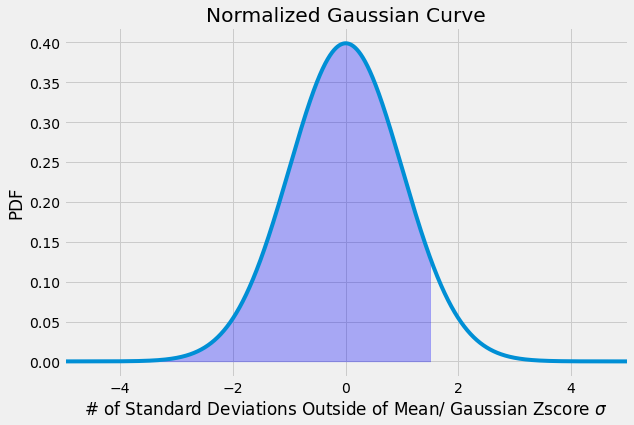

In [28]:
#integral from z1 to z_measured shaded 

fig, ax = plt.subplots(figsize = (9,6))
ax.plot(z_all, y2)

ax.fill_between (z,y,0, alpha = 0.3, color ='b')
ax.set_xlim([z1,z2])
ax.set_xlabel('# of Standard Deviations Outside of Mean/ Gaussian Zscore $\sigma$')
ax.set_ylabel('PDF')
ax.set_title('Normalized Gaussian Curve')

plt.savefig('Normalized Gaussian Curve Test.pdf')
plt.show()

# Calculate p-value 
 * we aim to be within two sigmas {2$\sigma$}

In [77]:
Zscore = (x_measured -mu)/ sigma 

cdf = sc.stats.norm.cdf(Zscore,0,1)

print('CDF from the normalized distribution= ', cdf)

CDF from the normalized distribution=  0.9331927987311412


# Compare measured and predicted value using Gaussian z-score
* These print the same value, whether you normalize or not 

In [78]:
print('CDF from the normalized distribution= ', cdf)
print('CDF from the original distribution = ', cdf_unnorm)

CDF from the normalized distribution=  0.9331927987311412
CDF from the original distribution =  0.9331927987311412
